# Titanic Data Analysis

## Introduction

In this project, we are analyzing the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Here are the questions that I will try to find answer for throughout the project:  

1- Gender Distribution  
2- Age Distribution  
3- Does gender plays a role in making people more likely to survive?  
4- What is the relation between age group and survival?  
5- What is to co-relation between the age and the type of fare?

## Data Wrangling
The data wrangling process is done in the following code. I filtered out rows with invalid value for age, sex and fare.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('titanic-data.csv')

print len(titanic)

#filter out rows without age value
titanic = titanic[titanic.Age > 0]

print len(titanic)

#filter out rows with 0 in the fare column
titanic = titanic[titanic.Fare > 0]

print len(titanic)

#filter out gender with invalid values
titanic = titanic[titanic['Sex'].isin(['male' ,'female'])]

print len(titanic)

891
714
707
707


I added couple of columns to the dataset to be able to better represent the results.

In [69]:
#Converts gender in numberic format to human readable values
def ConvertSex(sex):
    if sex == 'male':
        return 1
    elif sex == 'female':
        return -1
    else:
        return 0

#Convert Survived or Died value
def ConvertSurvival(hasSurvived):
    if hasSurvived == 1:
        return 'Survived'
    elif hasSurvived == 0:
        return 'Died'
    else:
        return 'NA'

#Converts age to age group 
def ConvertAgeGroup(age):
    if 0 <= age <= 10:
        return '0-10'
    elif 10 < age <= 20:
        return '10-20'
    elif 20 < age <= 30:
        return '20-30'
    elif 30 < age <= 40:
        return '30-40'
    elif 40 < age <= 50:
        return '40-50'
    elif 50 < age <= 60:
        return '50-60'
    elif 60 < age <= 70:
        return '60-70'
    elif 70 < age <= 80:
        return '70-80'

#standardize the value    
def ConvertToStandard(col, value):
    std = col.std()
    mean = col.mean()
    return (value - mean) / std

#adding comuted columns
titanic['ConvertedSurvived'] = titanic['Survived'].apply(ConvertSurvival)
titanic['ConvertedSex'] = titanic['Sex'].apply(ConvertSex)
titanic['ConvertedAgeGroup'] = titanic['Age'].apply(ConvertAgeGroup)
titanic['StandardAge'] = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std(ddof=0)
titanic['StandardFare'] = (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std(ddof=0)
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=[0,13,40,90], labels=['Childs','Adults','Seniors'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ConvertedSurvived,ConvertedSex,ConvertedAgeGroup,StandardAge,StandardFare,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,1,20-30,-0.525496,-0.524009,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,-1,30-40,0.574268,0.683491,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,-1,20-30,-0.250555,-0.511281,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,-1,30-40,0.368062,0.340601,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,1,30-40,0.368062,-0.508923,Adults


## Exploration


### Question 1: Gender Distribution


Sex
female    261
male      446
Name: , dtype: int64



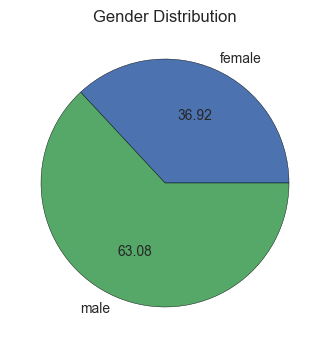

In [74]:
categoryCount = pd.Series(titanic.groupby(['Sex']).count()['PassengerId'], name ='')
categoryCount.plot.pie(figsize=(4, 4),autopct='%.2f' , title="Gender Distribution")
print ''
print categoryCount
print ''

### Question 2: Age Group Distribution


AgeGroup
Childs      71
Adults     487
Seniors    149
Name: , dtype: int64



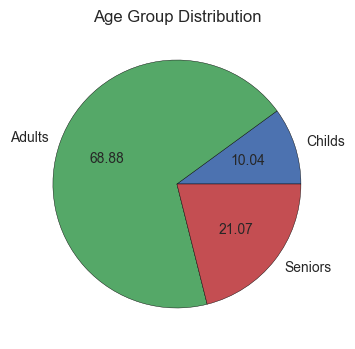

In [75]:
categoryCount = pd.Series(titanic.groupby(['AgeGroup']).count()['PassengerId'], name='')
categoryCount.plot.pie(figsize=(4, 4),autopct='%.2f', title="Age Group Distribution")
print ''
print categoryCount
print ''

### Question 3: Survival by Gender
as it's illustrated in the following diagram there seems to be a correlation between gender and chance of survival. It is clear that females had better chance to survive. In our sample about 79 percent of males died while only about 24 percent of females could not survive.


0    0.793722
1    0.245211
dtype: float64



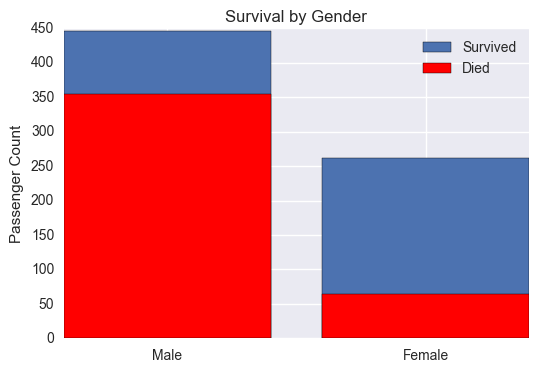

In [76]:
groups = [0,1] 
categoryCount = titanic.groupby(['Sex']).count()['PassengerId']
survivalBreakdown = titanic.groupby(['ConvertedSurvived','Sex']).count()['PassengerId']
totalCount = (categoryCount['male'],categoryCount['female'])
diedCount = (survivalBreakdown['Died']['male'],survivalBreakdown['Died']['female'])

print ''
print pd.Series(diedCount)/pd.Series(totalCount)
print ''

p1 = plt.bar(groups, totalCount, align='center')
p2 = plt.bar(groups, diedCount, align='center',  color='red')

plt.xticks(groups, ('Male','Female'))
plt.ylabel('Passenger Count')
plt.title('Survival by Gender')
plt.legend((p1[0],p2[0]),('Survived','Died'))
plt.show()

### Question 4: Survival by Age
As described in the following diagram, children had about 60 (1-0.406250) percent chance of survival, people from age 10 to 60 had about 40 percent chance and elderly people had about 80 (0.800000) percent rate of death. So, there could be a correlation between the age and the survival chance.


0    0.406250
1    0.614035
2    0.637555
3    0.543046
4    0.611765
5    0.595238
6    0.764706
7    0.800000
dtype: float64



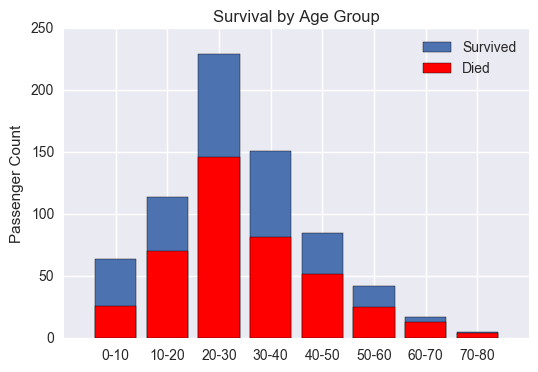

In [81]:
groups = [0,1,2,3,4,5,6,7] 
categoryCount = titanic.groupby(['ConvertedAgeGroup']).count()['PassengerId']
survivalBreakdown = titanic.groupby(['ConvertedSurvived','ConvertedAgeGroup']).count()['PassengerId']

totalCount = (categoryCount['0-10'],
              categoryCount['10-20'],
              categoryCount['20-30'],
              categoryCount['30-40'],
              categoryCount['40-50'],
              categoryCount['50-60'],
              categoryCount['60-70'],
              categoryCount['70-80'])
diedCount = (survivalBreakdown['Died']['0-10'],
             survivalBreakdown['Died']['10-20'],
             survivalBreakdown['Died']['20-30'],
             survivalBreakdown['Died']['30-40'],
             survivalBreakdown['Died']['40-50'],
             survivalBreakdown['Died']['50-60'],
             survivalBreakdown['Died']['60-70'],
             survivalBreakdown['Died']['70-80'])

print ''
print pd.Series(diedCount)/pd.Series(totalCount)
print ''

p1 = plt.bar(groups, totalCount, align='center')
p2 = plt.bar(groups, diedCount, align='center', color='red')

plt.xticks(groups, ('0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'))
plt.ylabel('Passenger Count')
plt.title('Survival by Age Group')
plt.legend((p1[0],p2[0]),('Survived','Died'))
plt.show()

### Question 5: Correlation
In this question, we study the correlation between age and wellness (assuming wealthy people purchased more expensive tickets) using Pearson's r method. Since the calculated value is 0.102287939758 and it's near 0, there is not a strong correlation between age and wellness.


0.0989808122217



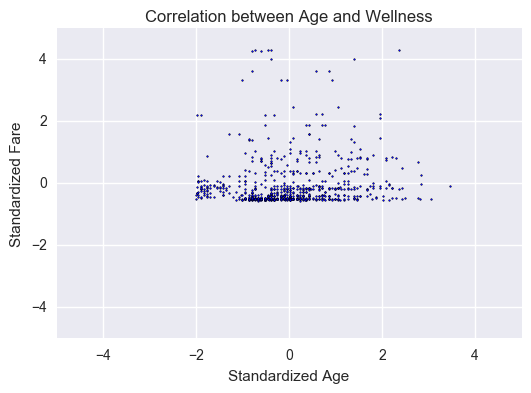

In [83]:
standardAgeMean = titanic['StandardAge'].mean()
standardAgeStd = titanic['StandardAge'].std()
lx = standardAgeMean-(5*standardAgeStd)
hx = standardAgeMean+(5*standardAgeStd)
standardFareMean = titanic['StandardFare'].mean()
standardFareStd = titanic['StandardFare'].std()
ly = standardFareMean-(5*standardFareStd)
hy = standardFareMean+(5*standardFareStd)

print ''
print (titanic['StandardAge'] * titanic['StandardFare']).mean()
print ''

plt.scatter (titanic['StandardAge'],titanic['StandardFare'], s=1.5)
plt.axis([lx, hx, ly, hy])
plt.title('Correlation between Age and Wellness')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Fare')
plt.show()

## Conclusion
As one would expect, the study shows that women and children had better chance of survival in the accident. In the initial dataset there were 177 (891-714) entries without age value and 7 (714-707) entries without fare value. These rows were removed from the dataset that I ran my analysis on. Another important note is that the dataset does not include all the passengers of Titanic and it's not clear that the uneven distribution of genders is reflecting the actual population distribution of genders or not.  
To increase the chance of survival in future accidents, other information could be added to the analysis. For example, the position of lifeboats data could be analyzed against the position of cabins to determine whether locating the lifeboats could be optimized.